In [1]:
from netCDF4 import Dataset
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.colors as colors
%matplotlib inline

In [2]:
gridDS = Dataset('/pscratch/sd/s/srai/ROMSwithWRF/run/input/ROMSgrid.nc')
UAREA = np.array(gridDS.variables['UAREA'])
gridDS.variables.keys()

# kmtDS = Dataset('/gpfs/fs1/home/srai6/Desktop/SecondEddyKillingPaper/ROMSandWRF/Instantaneous/KMT_ROMSnWRF.nc')
# kmt = np.array(kmtDS.variables['KMT'][:,:], dtype=float)

dict_keys(['ULAT', 'ULONG', 'DXU', 'DYU', 'RADIUS', 'UAREA'])

In [3]:
mask = np.zeros(UAREA.shape, dtype=float)
mask[70:-70,70:-70] = 1

In [4]:
ellList = [10, 20, 50, 80, 100, 200, 300, 500, 800]
ndays = 1
nell = len(ellList)

In [5]:
filt = '/pscratch/sd/s/srai/ROMSwithWRF/run/output/ROMS_withWRF_data_filteredAt_0200_timeAt000.nc'
unfilt = '/pscratch/sd/s/srai/ROMSwithWRF/run/input/ROMS_withWRF_data.nc'
wrf = '/pscratch/sd/s/srai/ROMSwithWRF/Downloaded/WRF_sfc_3h_201601.nc'


ds = Dataset(filt)
ut_bar = np.array(ds.variables['tauxUo'])
vt_bar = np.array(ds.variables['tauyVo'])
uo_bar = np.array(ds.variables['uo'])
vo_bar = np.array(ds.variables['vo'])
ua_bar = np.array(ds.variables['ua'])
va_bar = np.array(ds.variables['va'])
tx_bar = np.array(ds.variables['taux'])
ty_bar = np.array(ds.variables['tauy'])
EPPA = (ut_bar - tx_bar*uo_bar) +(vt_bar - ty_bar*vo_bar)
ds.close()

ds = Dataset(unfilt)
uo = np.array(ds.variables['uo'][0,:,:])
vo = np.array(ds.variables['vo'][0,:,:])
ua = np.array(ds.variables['ua'][0,:,:])
va = np.array(ds.variables['va'][0,:,:])
tx = np.array(ds.variables['taux'][0,:,:])
ty = np.array(ds.variables['tauy'][0,:,:])
Cd = np.array(ds.variables['CD'][0,:,:]) * 1.293
ds.close()

# ds = Dataset(wrf)
# Cd = np.array(ds.variables['CD'][0,:,:]) * 1.293
# ds.close()

ua_p = ua - ua_bar
va_p = va - va_bar
uo_p = uo - uo_bar
vo_p = vo - vo_bar
tx_p = tx - tx_bar
ty_p = ty - ty_bar

In [6]:
ua_mag = np.sqrt(ua**2 + va**2)

ua_bar_mag = np.sqrt(ua_bar**2 + va_bar**2)

rhs = Cd * ua_mag *(ua_p*uo_p + va_p*vo_p - uo_p*uo_p - vo_p*vo_p)

RHS = Cd * ua_bar_mag *(ua_p*uo_p + va_p*vo_p - uo_p*uo_p - vo_p*vo_p)

MHS = tx_p*uo_p + ty_p*vo_p

rhs.shape, RHS.shape, MHS.shape

((434, 1120), (434, 1120), (434, 1120))

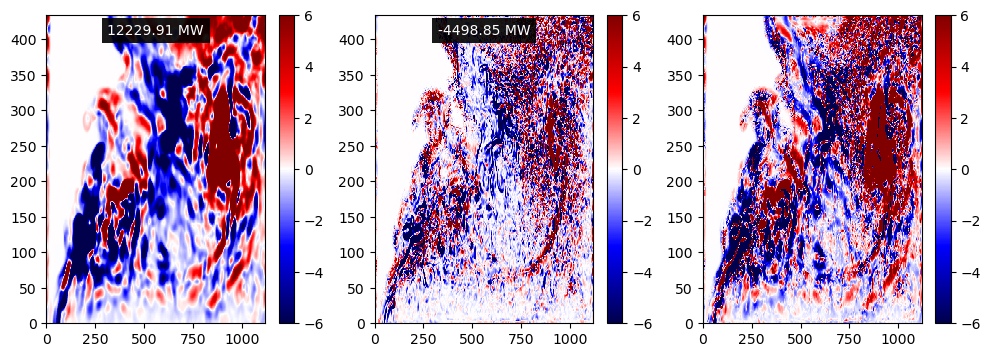

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(rhs*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(rhs*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-rhs)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

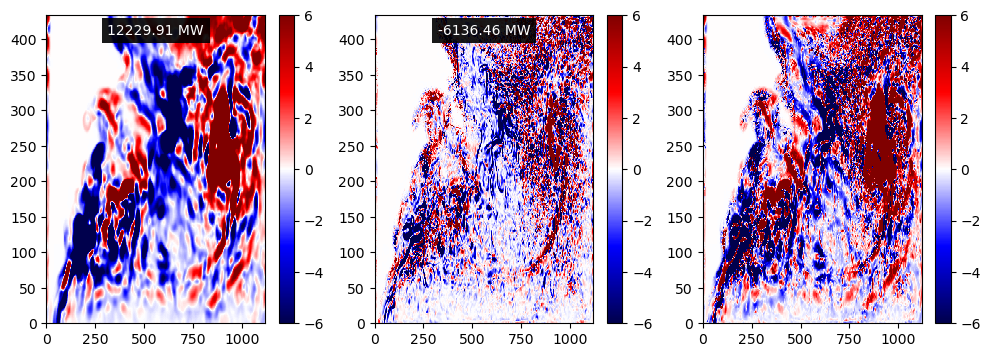

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(RHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(RHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-RHS)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

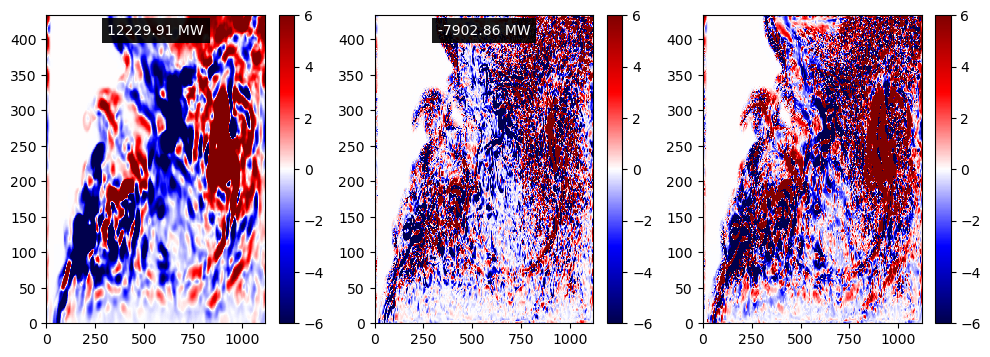

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(MHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(MHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-MHS)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

In [10]:
kernelx = 15
kernely = 15

kernel = np.ones((kernely, kernelx), dtype=float)
kernel/= np.sum(kernel)

RHS[:,:] = scipy.signal.convolve2d(RHS[:,:], kernel, mode='same', boundary='symm')
MHS[:,:] = scipy.signal.convolve2d(MHS[:,:], kernel, mode='same', boundary='symm')
rhs[:,:] = scipy.signal.convolve2d(rhs[:,:], kernel, mode='same', boundary='symm')

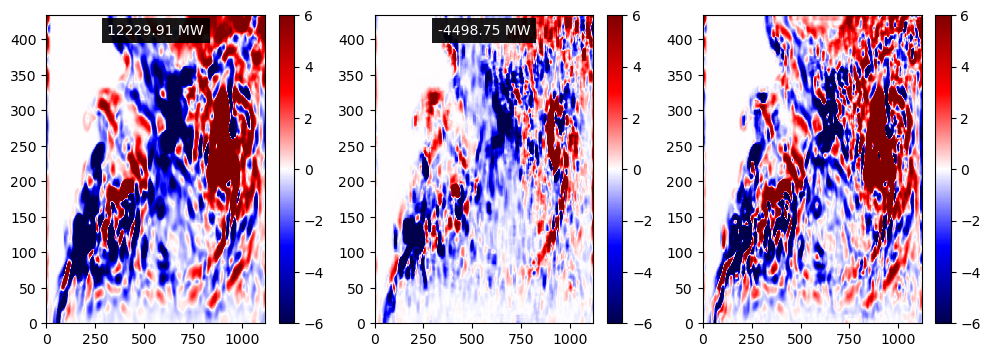

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(rhs*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(rhs*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-rhs)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

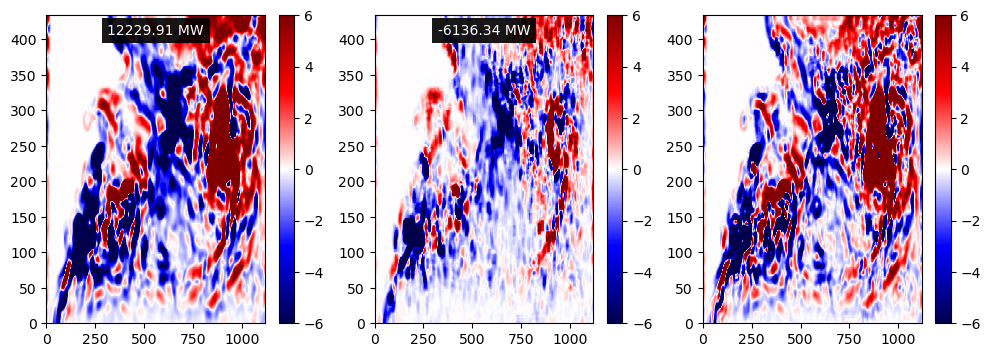

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))

pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(RHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(RHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-RHS)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

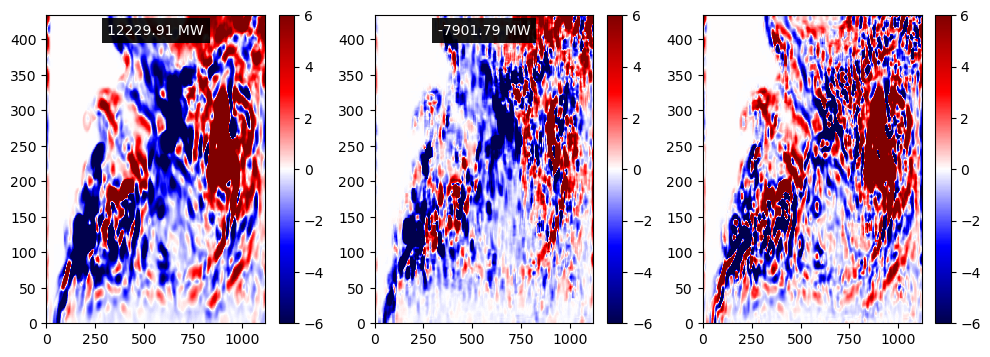

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(EPPA*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(EPPA*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(MHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(MHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
pmesh = ax.pcolormesh((EPPA-MHS)*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

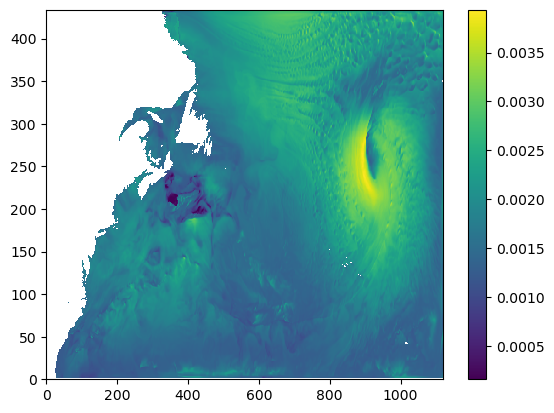

In [14]:
Cd[uo ==0] = float('nan')
plt.pcolormesh(Cd)
plt.colorbar()

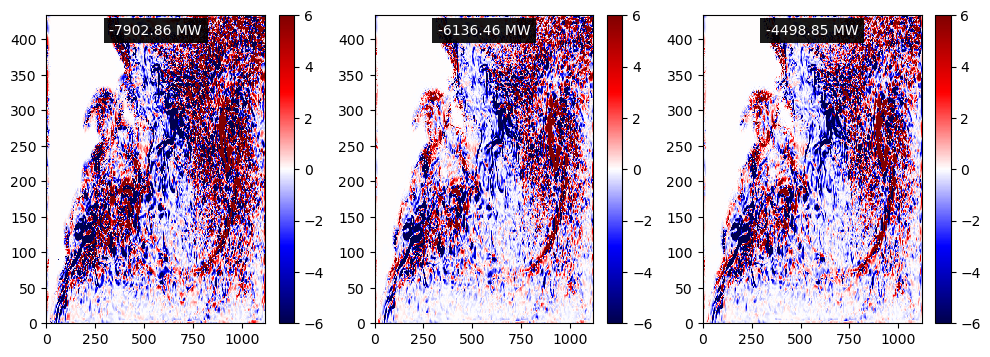

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True)
v = 6
ax = axes[0]
txt = f'{np.nansum(MHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(MHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[1]
txt = f'{np.nansum(RHS*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(RHS*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )

ax = axes[2]
txt = f'{np.nansum(rhs*UAREA)/1e6:5.2f} MW'
tb = ax.text(0.5, 0.95, txt, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, color='white')
tb.set_bbox(dict(facecolor='black', alpha=0.9, edgecolor='None'))
pmesh = ax.pcolormesh(rhs*1e3, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(pmesh, ax = ax, )